# Guided Project: Visualizing Earnings Based On College Majors


Hi! Welcome to another Guided Project! 

In this project, we'll be working with a dataset on the job outcomes of students who graduated from college between 2010 and 2012. The original data on job outcomes was released by [American Community Survey](https://www.census.gov/programs-surveys/acs/), which conducts surveys and aggregates the data. FiveThirtyEight cleaned the dataset and released it on their [Github repo](https://github.com/fivethirtyeight/data/tree/master/college-majors).

Each row in the dataset represents a different major in college and contains information on gender diversity, employment rates, median salaries, and more. Let's take a look at the columns in the data set:

* `Rank` - Rank by median earnings (the dataset is ordered by this column).
* `Major_code` - Major code.
* `Major` - Major description.
* `Major_category` - Category of major.
* `Total` - Total number of people with major.
* `Sample_size` - Sample size (unweighted) of full-time.
* `Men` - Male graduates.
* `Women` - Female graduates.
* `ShareWomen` - Women as share of total.
* `Employed` - Number employed.
* `Median` - Median salary of full-time, year-round workers.
* `Low_wage_jobs` - Number in low-wage service jobs.
* `Full_time` - Number employed 35 hours or more.
* `Part_time` - Number employed less than 35 hours.

The objective of this project is to answer questions like: Do students in more popular majors make more money? How many majors are predominantly male? Predominantly female? Which category of majors have the most students?

We'll start out this project by taking an initial look at the data set. 

## First impressions

Here we'll start out by looking at the first and last rows of the data set, and taking a general look at the data. 

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

recent_grads = pd.read_csv("/Catharine/DataSets/recent-grads.csv")

unrate = pd.read_csv("/Catharine/DataSets/unrate.csv")

In [47]:
recent_grads.iloc[0]

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object

In [48]:
recent_grads[['Total','Sample_size']].sort_values('Total')

,Total,Sample_size
73,124.0,4
52,609.0,7
112,685.0,4
33,720.0,5
1,756.0,7
...,...,...
57,234590.0,2380
123,280709.0,1370
76,329927.0,4212
145,393735.0,2584


In [49]:
recent_grads.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [50]:
recent_grads.tail()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,...,237,410,87,0.104946,22000,20000,22000,288,338,192


In [51]:
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


In [52]:
raw_data_count = recent_grads.shape[0]
print(raw_data_count)

173


There are currently 173 rows in the data set, however we must remove the rows that contain null values. We'll do that though the `dropna` function. 

In [53]:
recent_grads = recent_grads.dropna()

cleaned_data_count = recent_grads.shape[0]
print(cleaned_data_count)

172


Now the number of rows is 172, so only 1 row was removed from the data set. 

## Analyzing the relationship between Majors and Salaries

In this section we will create scatter plots to try to answer the following questions:

* Do students in more popular majors make more money?
* Do students that majored in subjects that were majority female make more money?
* Is there any link between the number of full-time employees and median salary?

To look at the relationship between popular majors and salaries, we can compare the `total` column, which tells us the total number of people with major, and the `Median` column, which tells us the median salary of full-time, year-round workers.

Text(0, 0.5, 'Median Salary per Major')

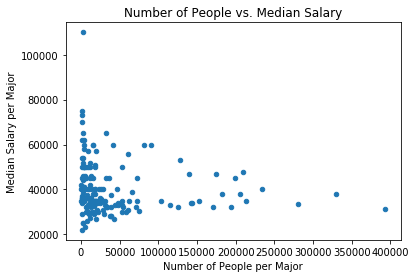

In [54]:
ax1 = recent_grads.plot(x='Total', y='Median', kind='scatter')
ax1.set_title('Number of People vs. Median Salary')
ax1.set_xlabel('Number of People per Major')
ax1.set_ylabel('Median Salary per Major')

From the scatter plot above we cannot see an association between popularity in majors and salaries. 

Text(0, 0.5, 'Median Salary per Major')

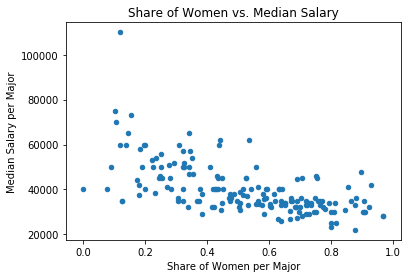

In [55]:
ax2 = recent_grads.plot(x='ShareWomen', y='Median', kind='scatter')
ax2.set_title('Share of Women vs. Median Salary')
ax2.set_xlabel('Share of Women per Major')
ax2.set_ylabel('Median Salary per Major')

There seems to be a moderate negative association between share of women and median salary. Meaning, the higher the share of women in the major, the lower the salaries seem to be. There are outliers, however.

Text(0, 0.5, 'Median Salary per Major')

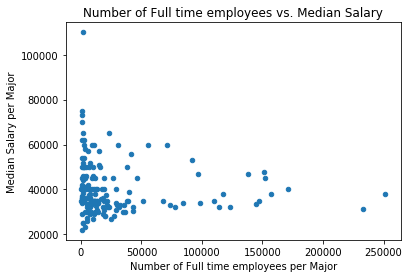

In [56]:
ax3 = recent_grads.plot(x='Full_time', y='Median', kind='scatter')
ax3.set_title('Number of Full time employees vs. Median Salary')
ax3.set_xlabel('Number of Full time employees per Major')
ax3.set_ylabel('Median Salary per Major')

Like the first graph we cannot see an association between quantity of full time employees and the salaries. 

Therefor, the answers to the questions go as follows:

- Do students in more popular majors make more money? **No, they don't**
- Do students that majored in subjects that were majority female make more money? **No, they don't**
- Is there any link between the number of full-time employees and median salary? **No, there is not**


## Analyzing the distribuitions of Median Salaries and Shares of Women

In this section we will use histograms to answer the following questions:

- What percent of majors are predominantly male? Predominantly female?
- What's the most common median salary range?

To find out what percentage of majors predominantly female vs. male, we can create a histogram containing only two bins, ranging from 0 to 1. 

Text(0, 0.5, 'Number of Majors')

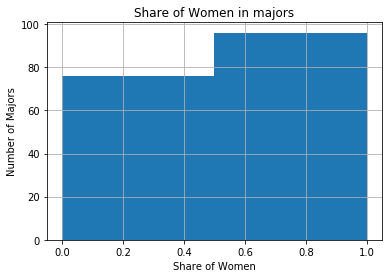

In [57]:
ax4 = recent_grads['ShareWomen'].hist(bins = 2, range=(0,1))
ax4.set_title('Share of Women in majors')
ax4.set_xlabel('Share of Women')
ax4.set_ylabel('Number of Majors')

In [58]:
recent_grads['ShareWomen'].value_counts(bins=2).sort_index()

(-0.0019690000000000003, 0.484]    74
(0.484, 0.969]                     98
Name: ShareWomen, dtype: int64

From the histogram, we can see that the majority of majors, 57% to be more precise, has a greater female share. Therefor we can answer: 43% of majors are predominantly male and 56% are predominantly female. 

Now let's figure out the most common median salary range.

Text(0, 0.5, 'Number of Majors')

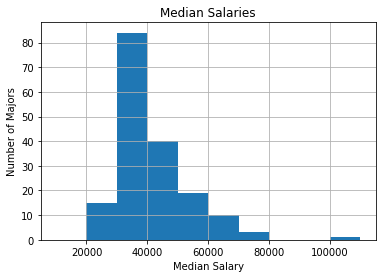

In [59]:
ax5 = recent_grads['Median'].hist(bins = 10, range=(10000,110000))
ax5.set_title('Median Salaries')
ax5.set_xlabel('Median Salary')
ax5.set_ylabel('Number of Majors')

The histogram tells us that the most common median salary range is between 30,000 and 40,000.

## Using scatter matrix plot

Another tool we can use to make these graphs are the scatter matrix plot. To do so, we must import `scatter_matrix` from the `pandas.plotting` library. 

Below we will use the scatter matrix plot to analyze the relationships and distribuitions of `ShareWomen` vs `Median`, and `Total`vs`Median`vs`ShareWomen`

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000195FA893E48>,
      dtype=object)

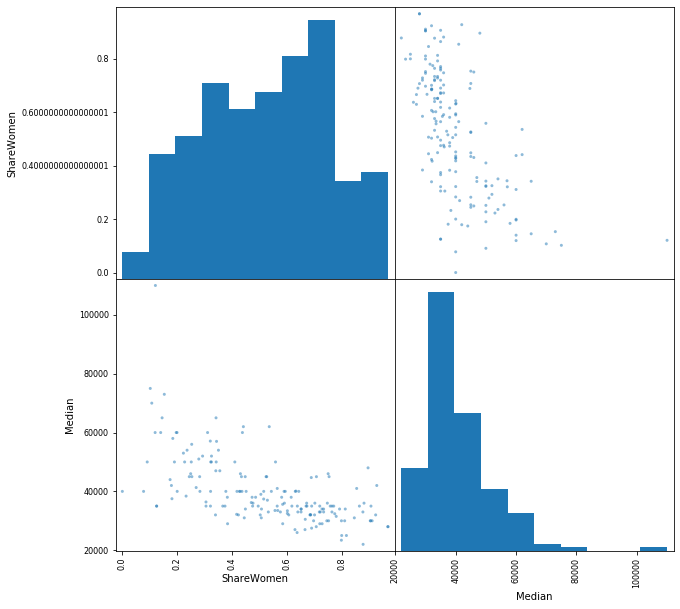

In [62]:
from pandas.plotting import scatter_matrix
scatter_matrix(recent_grads[['ShareWomen', 'Median']], figsize=(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000195FA9F1D48>,
      dtype=object)

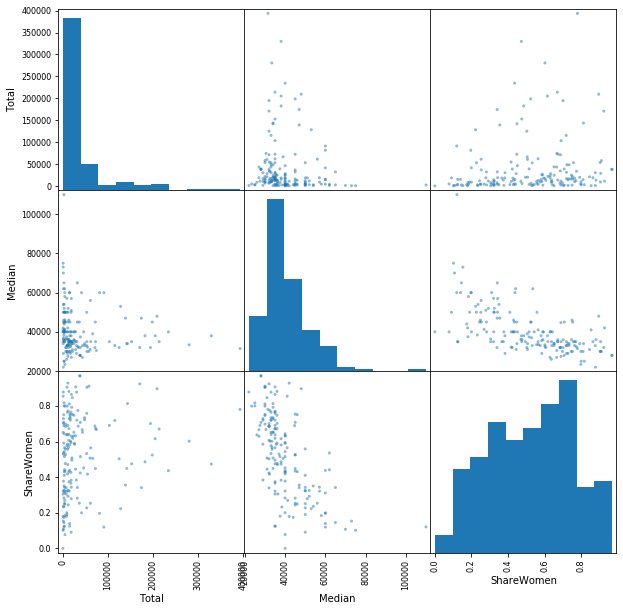

In [63]:
scatter_matrix(recent_grads[['Total', 'Median', 'ShareWomen']], figsize=(10,10))

## Using Bar Plots

We can also use bar plots to try to find some information. Because there are so many majors, it's not practical to make a bar plot with all the majors. In the bar plots below we will look at the first and last 10 majors of the data set. 

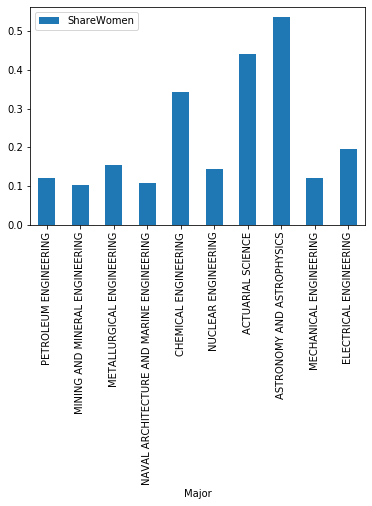

In [71]:
recent_grads[:10].plot.bar(x='Major', y='ShareWomen')

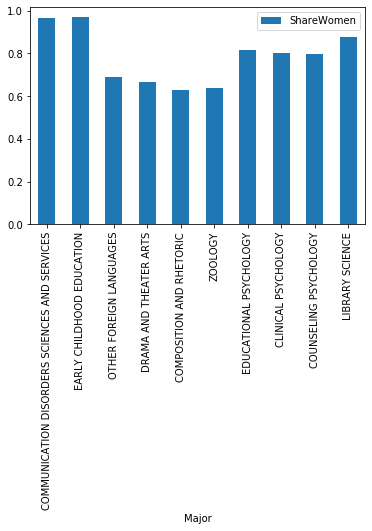

In [67]:
recent_grads[-10:].plot.bar(x='Major', y='ShareWomen')

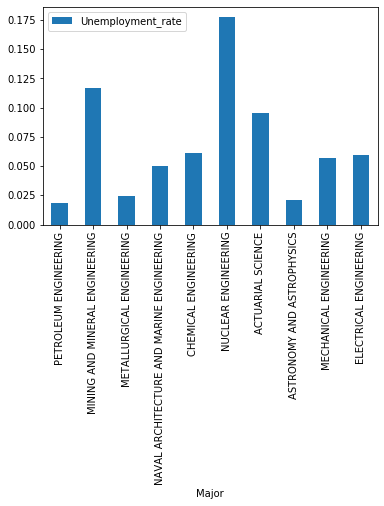

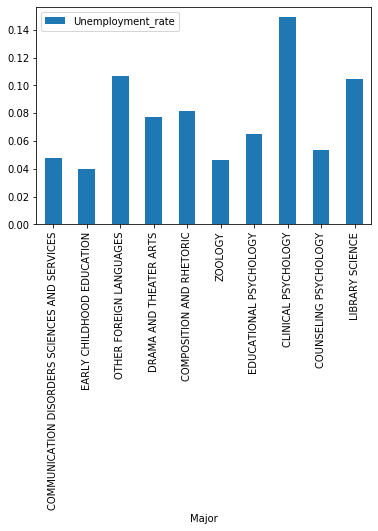

In [69]:
recent_grads[:10].plot.bar(x='Major', y='Unemployment_rate')
recent_grads[-10:].plot.bar(x='Major', y='Unemployment_rate')

## Conclusion 

In this project we used scatter plots, histograms, bar plots, and scatter matrixs to find information, and we were able to answer the following questions:

- Do students in more popular majors make more money? **No, they don't**
- Do students that majored in subjects that were majority female make more money? **No, they don't**
- Is there any link between the number of full-time employees and median salary? **No, there is not**
- What percent of majors are predominantly male? Predominantly female? **43% and 57%, respectively**
- What's the most common median salary range? **30k-40k**